In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../heart_dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,55,1,0,124,261,0,1,141,0,0.3,1,0,1,0
1064,50,1,0,128,204,1,1,156,1,1.0,0,0,0,0
1065,60,1,0,140,207,0,0,138,1,1.9,1,1,1,0
1066,54,1,0,154,232,0,0,164,0,0.0,1,1,2,0


In [3]:
from tabulate import tabulate
distinct_values = []
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    distinct_values.append([column, num_distinct_values])

print(tabulate(distinct_values, headers=["Column", "Distinct Values"], tablefmt="grid"))

+----------+-------------------+
| Column   |   Distinct Values |
+==========+===================+
| age      |                49 |
+----------+-------------------+
| sex      |                 2 |
+----------+-------------------+
| cp       |                 4 |
+----------+-------------------+
| trestbps |                65 |
+----------+-------------------+
| chol     |               216 |
+----------+-------------------+
| fbs      |                 2 |
+----------+-------------------+
| restecg  |                 3 |
+----------+-------------------+
| thalach  |               109 |
+----------+-------------------+
| exang    |                 2 |
+----------+-------------------+
| oldpeak  |                89 |
+----------+-------------------+
| slope    |                 3 |
+----------+-------------------+
| ca       |                 4 |
+----------+-------------------+
| thal     |                 4 |
+----------+-------------------+
| target   |                 2 |
+---------

In [4]:
null_values = []
for column in df.columns:
    num_null_values = df[column].isnull().sum()
    null_values.append([column, num_null_values])

print(tabulate(null_values, headers=["Column", "NULL Values"], tablefmt="grid"))

+----------+---------------+
| Column   |   NULL Values |
+==========+===============+
| age      |             0 |
+----------+---------------+
| sex      |             0 |
+----------+---------------+
| cp       |             0 |
+----------+---------------+
| trestbps |             0 |
+----------+---------------+
| chol     |             0 |
+----------+---------------+
| fbs      |             0 |
+----------+---------------+
| restecg  |             0 |
+----------+---------------+
| thalach  |             0 |
+----------+---------------+
| exang    |             0 |
+----------+---------------+
| oldpeak  |             0 |
+----------+---------------+
| slope    |             0 |
+----------+---------------+
| ca       |             0 |
+----------+---------------+
| thal     |             0 |
+----------+---------------+
| target   |             0 |
+----------+---------------+


In [5]:
print("Number of Duplicate Rows: ", df.duplicated().sum())

Number of Duplicate Rows:  0


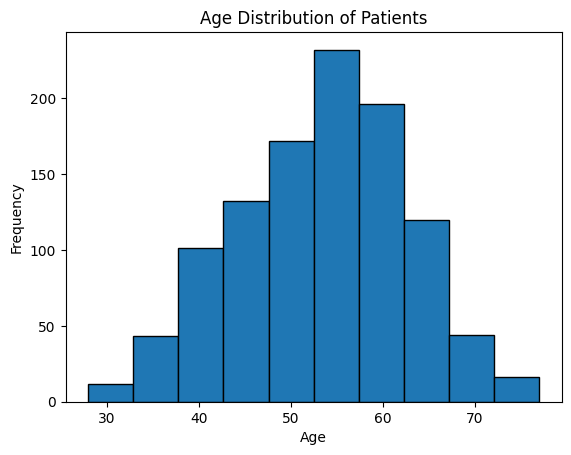

In [6]:
# 1) AGE
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

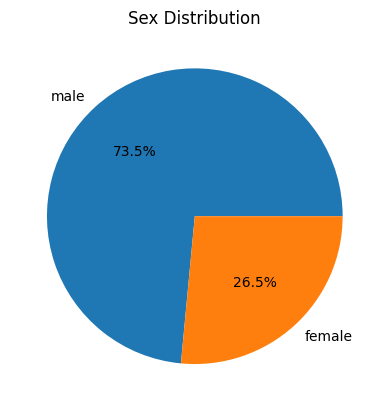

In [7]:
# 2) Sex
sex_mapping = {1: 'male',
               0: 'female'}
df['sex'] = df['sex'].map(sex_mapping)

sex_count = df['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

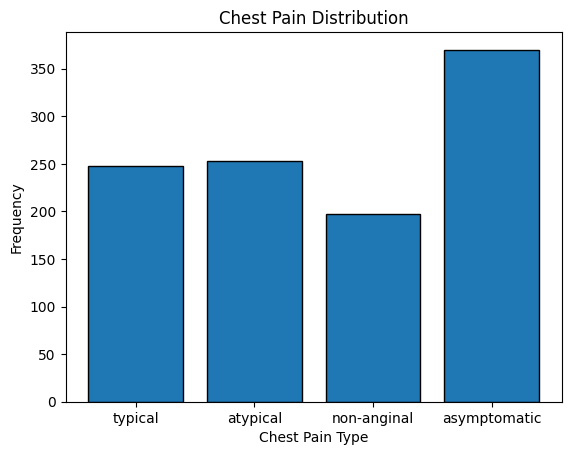

In [8]:
# 3) Chest Pain
cp_labels = {
    0: 'typical',
    1: 'atypical',
    2: 'non-anginal',
    3: 'asymptomatic'
}

cp_counts = df['cp'].value_counts().sort_index()

plt.bar(cp_counts.index, cp_counts.values, edgecolor='black')
plt.xticks(ticks=cp_counts.index, labels=[cp_labels[i] for i in cp_counts.index])
plt.title('Chest Pain Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

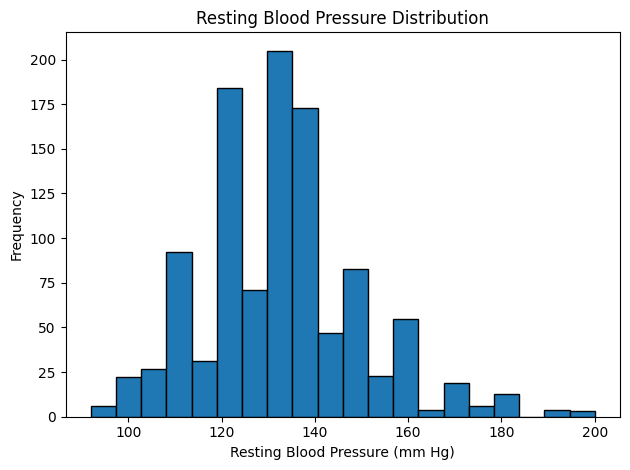

In [9]:
# 4) Resting Blood Pressure
plt.hist(df['trestbps'], bins=20, edgecolor='black')
plt.title('Resting Blood Pressure Distribution')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

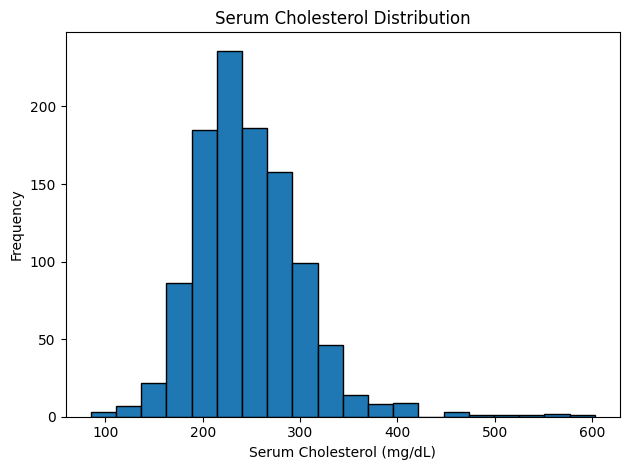

In [10]:
# 5) Serum Cholestoral
plt.hist(df['chol'], bins=20, edgecolor='black')
plt.title('Serum Cholesterol Distribution')
plt.xlabel('Serum Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

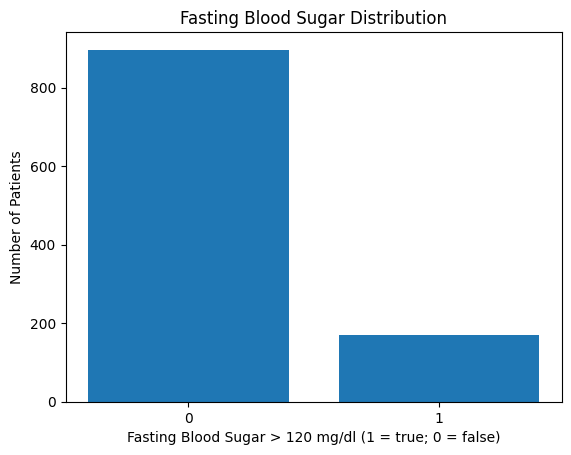

In [11]:
# 6) Fasting Blood Sugar
fbs_count = df['fbs'].value_counts()
plt.bar(fbs_count.index, fbs_count.values)
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(fbs_count.index)
plt.show()

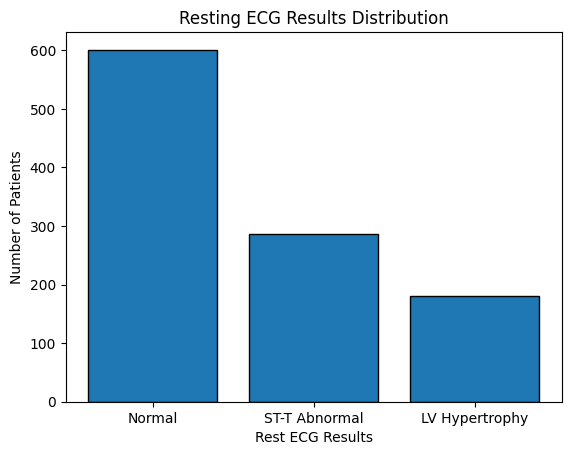

In [12]:
# 7) Resting Electrocardiographic Results
restecg_labels = { 
    0: 'Normal',
    1: 'ST-T Abnormal', # ST-T wave abnormalit
    2: 'LV Hypertrophy' # left ventricular hypertrophy
}

restecg_count = df['restecg'].value_counts().sort_index()

plt.bar(restecg_count.index, restecg_count.values, edgecolor='black')
plt.xticks(ticks=restecg_count.index, labels=[restecg_labels[i] for i in restecg_count.index])
plt.title('Resting ECG Results Distribution')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.show()

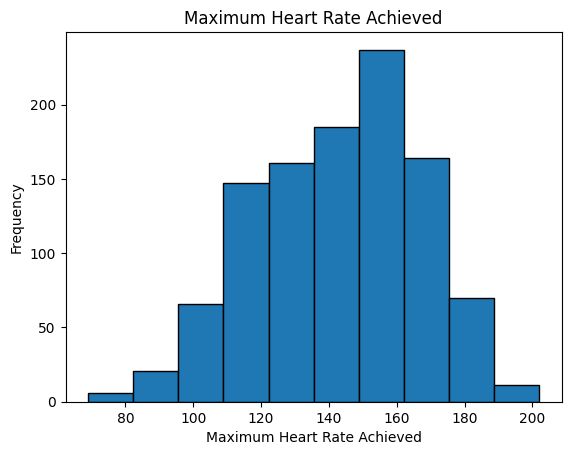

In [13]:
# 8) Maximum Heart Rate Achieved
plt.hist(df['thalach'], bins=10, edgecolor='black')
plt.title('Maximum Heart Rate Achieved')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()

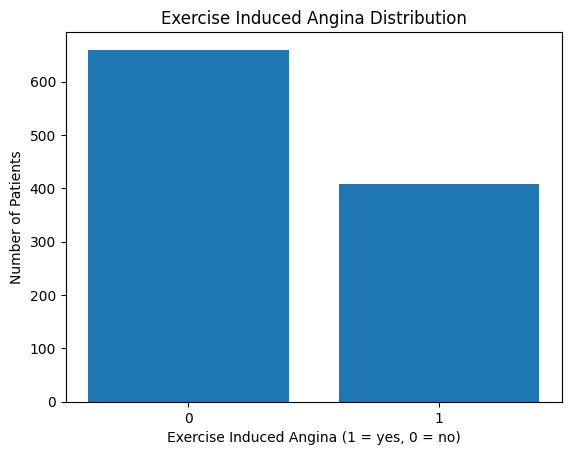

In [14]:
# 9) Exercise Induced Angina
exang_count = df['exang'].value_counts()
plt.bar(exang_count.index, exang_count.values)
plt.title('Exercise Induced Angina Distribution')
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')
plt.ylabel('Number of Patients')
plt.xticks(exang_count.index)
plt.show()

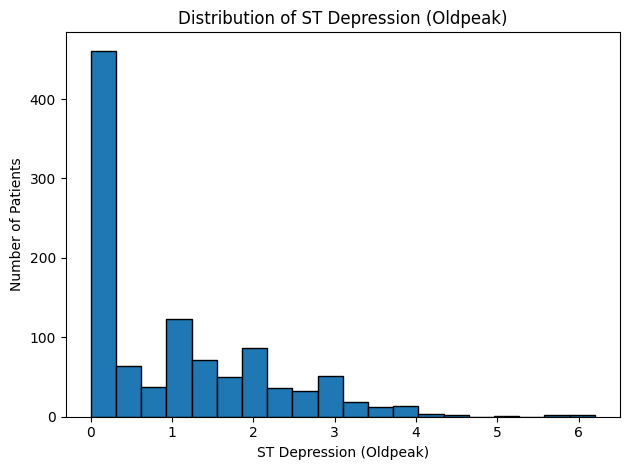

In [15]:
# 10) ST Depression (Oldpeak)
plt.hist(df['oldpeak'], bins=20, edgecolor='black')
plt.title('Distribution of ST Depression (Oldpeak)')
plt.xlabel('ST Depression (Oldpeak)')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

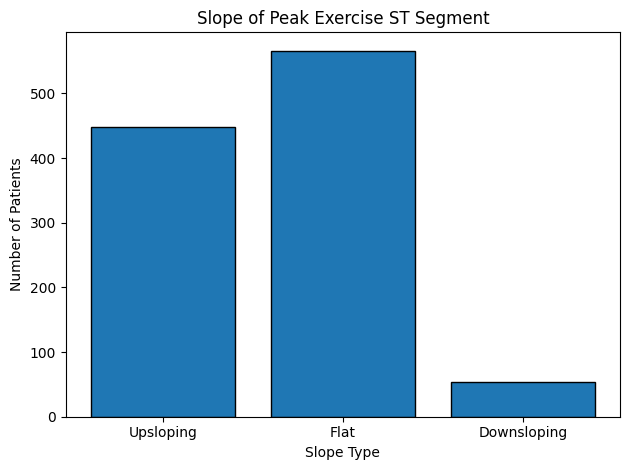

In [16]:
# 11) Slope of Peak Exercise ST Segment
slope_labels = {
    0: 'Upsloping',
    1: 'Flat',
    2: 'Downsloping'
}

slope_count = df['slope'].value_counts().sort_index()

labels = [slope_labels[i] for i in slope_count.index]

plt.bar(labels, slope_count.values, edgecolor='black')
plt.title('Slope of Peak Exercise ST Segment')
plt.xlabel('Slope Type')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

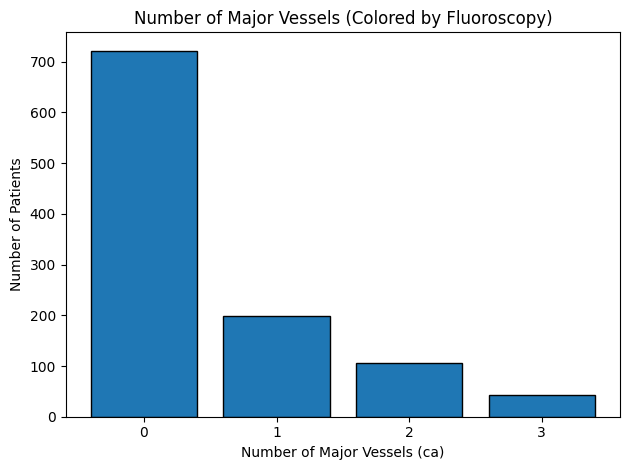

In [17]:
# 12) Number of Major Vessels (0-3) Colored by Flourosopy
ca_counts = df['ca'].value_counts().sort_index()


plt.bar(ca_counts.index.astype(str), ca_counts.values, edgecolor='black')
plt.title('Number of Major Vessels (Colored by Fluoroscopy)')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

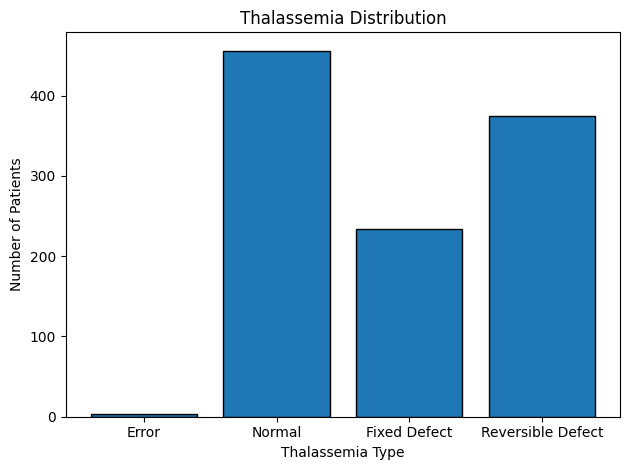

In [18]:
# 13) Thalassemia
thal_labels = {
    0: 'Error',
    1: 'Normal',
    2: 'Fixed Defect',
    3: 'Reversible Defect'
}

thal_count = df['thal'].value_counts().sort_index()
labels = [thal_labels[i] for i in thal_count.index]

plt.bar(labels, thal_count.values, edgecolor='black')
plt.title('Thalassemia Distribution')
plt.xlabel('Thalassemia Type')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

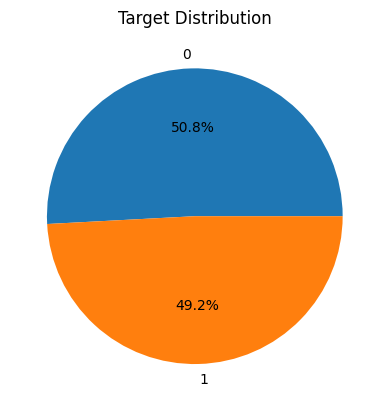

In [19]:
# 14) Target
target_count = df['target'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()